<img src = './photo/trip_1.jpg'>

# 😆 행복한 이에로사이다

### 🗻 분야
여행  
  
  
  
### 🏖️ 주제
귀찮은 여행 일정짜기 대신 해드립니다  
  


### 🏝️ 요구사항 정의
- __여행 코스 짜기__  
여행지 이름 / 별점 / 리뷰수 / 링크 / 주소   
여행지 관련 유튜브제목 / 링크  
  
  
- __숙박 추천__  
호텔 이름 / 별점 / 리뷰수 / 링크 / 주소   
  
  
- __맛집 추천__   
식당 이름 / 별점 / 리뷰수 / 링크 / 주소   
  
(제주도, 전주)




### 🚀 일정수립 
|날짜|시간|내용|
|:---:|:---|:---|
|2/8|9:30 - 10:30|주제 및 역할 정의 / 수집대상 분석,설계 |
|   |10:30 - 24:00|크롤링 개발 |
|2/9|9:00 - 12:00|크롤링 개발|
|   |13:00 - 13:30| 데이터 적재 |       
|   |13:30 - 15:30|정합성검증 및 발표준비|



### 🪐 추출대상 사이트
- 구글맵
- 카카오맵
- 유튜브
- 네이버 블로그


### 🚴 조원별 역할 정의  		
    
|이름|직책|역할|
|:---:|:---|:---|
|이채림|조장 |카카오맵 여행지 크롤링, 크롤링 연계, 경로추천 로직설계, DB적재|
|김단비|서기|여행 유튜브, 블로그 크롤링, 경로추천 로직설계, DB적재 |
|이은혜|CTO|구글맵 숙박,식당 크롤링, DB적재, ERD 생성|
|이소영|발표|카카오맵 식당 크롤링, 테이블정의서 작성, DB적재, 발표자료생성 |
    


# 테이블 정의서

<img src = './photo/table.png'>

# ERD

<img src = './photo/ERD.png'>

In [ ]:
from IPython.display import Image
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import psycopg2

# 🩱 구글맵 호텔 & 맛집 추천 - 은혜

In [6]:
# 결과 리스트 함수
name=[]
star= []
cnt=[]
price=[] 

def hotel_review():
    hotels=driver.find_elements_by_class_name('qBF1Pd')
    for hotel in hotels:
        n=hotel.text
        name.append(n)
        #print(hotel)

    stars=driver.find_elements_by_class_name('MW4etd')
    for star1 in stars:
        s=star1.text
        star.append(s)       

    reviews=driver.find_elements_by_class_name('UY7F9')
    for review in reviews:
        cnt1 = int(review.text.replace('(','').replace(')','').replace(',',''))
        cnt.append(cnt1)
        #print(cnt.text)
        

    containers = driver.find_elements_by_class_name('badge-container')
    for i in containers:
        price1 = i.find_element_by_class_name('wcldff')
        p = str(price1.text.replace("만",'')[1:])
        price.append(p)
        #print(p)


# print(name)
# print(star)
# print(cnt)
# print(price)
    for i in range(0, 5):
        print('호텔명:', name[i], '별점:', star[i], '리뷰수:', cnt[i], '가격:', price[i] )    

In [7]:
# 여행할 지역입력
keyword=input("지역 입력:")

driver=webdriver.Chrome()
driver.get("https://www.google.com/maps/")
time.sleep(2)

#검색창에 입력값 입력
searchbox = driver.find_element_by_css_selector("input#searchboxinput")
searchbox.send_keys(f"{keyword} 호텔")

#검색버튼 누르기
searchbutton = driver.find_element_by_css_selector("button#searchbox-searchbutton")
searchbutton.click()
time.sleep(5)

# 정렬기준 클릭
element = driver.find_element_by_css_selector("#pane > div > div.Yr7JMd-pane-content.cYB2Ge-oHo7ed > div > div > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.XS5mzc-on-hJDwNd-uMX1Ee.siAUzd-neVct > div > div.XwJl7b-map-XuHpsb-haAclf.xtu1r-K9a4Re-XuHpsb-haAclf > div.xtu1r-K9a4Re-ibnC6b-haAclf > div:nth-child(1) > div > button")
driver.execute_script("arguments[0].click();", element)

#평점순 정렬 클릭
ratebutton = driver.find_element_by_css_selector("#hovercard > div:nth-child(1)")
ratebutton.click()
time.sleep(5)

#관광지 평점별 상위 5개 호텔 추출
hotel_review()

C:\Users\eunhy\AppData\Local\Temp\ipykernel_12008\2018096083.py:9: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  searchbox = driver.find_element_by_css_selector("input#searchboxinput")
C:\Users\eunhy\AppData\Local\Temp\ipykernel_12008\2018096083.py:13: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  searchbutton = driver.find_element_by_css_selector("button#searchbox-searchbutton")
C:\Users\eunhy\AppData\Local\Temp\ipykernel_12008\2018096083.py:18: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  element = driver.find_element_by_css_selector("#pane > div > div.Yr7JMd-pane-content.cYB2Ge-oHo7ed > div > div > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.siAUzd-neVct.section

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#pane > div > div.Yr7JMd-pane-content.cYB2Ge-oHo7ed > div > div > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.XS5mzc-on-hJDwNd-uMX1Ee.siAUzd-neVct > div > div.XwJl7b-map-XuHpsb-haAclf.xtu1r-K9a4Re-XuHpsb-haAclf > div.xtu1r-K9a4Re-ibnC6b-haAclf > div:nth-child(1) > div > button"}
  (Session info: chrome=102.0.5005.115)
Stacktrace:
Backtrace:
	Ordinal0 [0x0091D953+2414931]
	Ordinal0 [0x008AF5E1+1963489]
	Ordinal0 [0x0079C6B8+837304]
	Ordinal0 [0x007C9500+1021184]
	Ordinal0 [0x007C979B+1021851]
	Ordinal0 [0x007F6502+1205506]
	Ordinal0 [0x007E44E4+1131748]
	Ordinal0 [0x007F4812+1198098]
	Ordinal0 [0x007E42B6+1131190]
	Ordinal0 [0x007BE860+976992]
	Ordinal0 [0x007BF756+980822]
	GetHandleVerifier [0x00B8CC62+2510274]
	GetHandleVerifier [0x00B7F760+2455744]
	GetHandleVerifier [0x009AEABA+551962]
	GetHandleVerifier [0x009AD916+547446]
	Ordinal0 [0x008B5F3B+1990459]
	Ordinal0 [0x008BA898+2009240]
	Ordinal0 [0x008BA985+2009477]
	Ordinal0 [0x008C3AD1+2046673]
	BaseThreadInitThunk [0x771EFA29+25]
	RtlGetAppContainerNamedObjectPath [0x776D7A7E+286]
	RtlGetAppContainerNamedObjectPath [0x776D7A4E+238]


# 식당(구글맵)

In [ ]:
# 결과 리스트 함수
name=[]
star=[]
cnt=[]

def restaurant(): 
    ress=driver.find_elements_by_class_name('qBF1Pd-haAclf')
    for res in ress:
        n=res.text
        name.append(n)
    
    stars=driver.find_elements_by_class_name('MW4etd')
    for st in stars:
        s=st.text
        star.append(s)
    
    reviews=driver.find_elements_by_class_name('UY7F9')
    for review in reviews:
        cnt1 = int(review.text.replace('(','').replace(')','').replace(',',''))
        cnt.append(cnt1)
    
    for i in range(0, 5):
        print('식당명:', name[i], '별점:', star[i], '리뷰수:', cnt[i]) 

In [ ]:
# 여행할 지역입력
keyword=input("지역 입력:")

#웹드라이버 열기
driver=webdriver.Chrome()
driver.get("https://www.google.com/maps/")
time.sleep(2)

#검색창에 입력값 입력
searchbox = driver.find_element_by_css_selector("input#searchboxinput")
searchbox.send_keys(f"{keyword} 맛집")

#검색버튼 누르기
searchbutton = driver.find_element_by_css_selector("button#searchbox-searchbutton")
searchbutton.click()
time.sleep(5)

#평점 선택
element = driver.find_element_by_css_selector("#pane > div > div.Yr7JMd-pane-content.cYB2Ge-oHo7ed > div > div > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.XS5mzc-on-hJDwNd-uMX1Ee.siAUzd-neVct > div > div.XwJl7b-map-XuHpsb-haAclf.xtu1r-K9a4Re-XuHpsb-haAclf > div.xtu1r-K9a4Re-ibnC6b-haAclf > div:nth-child(2) > div > button > span.uEubGf.gm2-subtitle-alt-2")
driver.execute_script("arguments[0].click();", element)

# 평점 4.5이상 선택
ratebutton = driver.find_element_by_css_selector("#action-menu > ul > li:nth-child(7)")
ratebutton.click()
time.sleep(5)

# 관광지 별점순 상위 5개 식당 결과
restaurant()

C:\Users\eunhy\AppData\Local\Temp\ipykernel_13000\2774931403.py:10: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  searchbox = driver.find_element_by_css_selector("input#searchboxinput")
C:\Users\eunhy\AppData\Local\Temp\ipykernel_13000\2774931403.py:14: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  searchbutton = driver.find_element_by_css_selector("button#searchbox-searchbutton")
C:\Users\eunhy\AppData\Local\Temp\ipykernel_13000\2774931403.py:19: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  element = driver.find_element_by_css_selector("#pane > div > div.Yr7JMd-pane-content.cYB2Ge-oHo7ed > div > div > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.siAUzd-neVct.sectio

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#pane > div > div.Yr7JMd-pane-content.cYB2Ge-oHo7ed > div > div > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.siAUzd-neVct.section-scrollbox.cYB2Ge-oHo7ed.cYB2Ge-ti6hGc.siAUzd-neVct-Q3DXx-BvBYQ > div.XS5mzc-on-hJDwNd-uMX1Ee.siAUzd-neVct > div > div.XwJl7b-map-XuHpsb-haAclf.xtu1r-K9a4Re-XuHpsb-haAclf > div.xtu1r-K9a4Re-ibnC6b-haAclf > div:nth-child(2) > div > button > span.uEubGf.gm2-subtitle-alt-2"}
  (Session info: chrome=102.0.5005.115)
Stacktrace:
Backtrace:
	Ordinal0 [0x0026D953+2414931]
	Ordinal0 [0x001FF5E1+1963489]
	Ordinal0 [0x000EC6B8+837304]
	Ordinal0 [0x00119500+1021184]
	Ordinal0 [0x0011979B+1021851]
	Ordinal0 [0x00146502+1205506]
	Ordinal0 [0x001344E4+1131748]
	Ordinal0 [0x00144812+1198098]
	Ordinal0 [0x001342B6+1131190]
	Ordinal0 [0x0010E860+976992]
	Ordinal0 [0x0010F756+980822]
	GetHandleVerifier [0x004DCC62+2510274]
	GetHandleVerifier [0x004CF760+2455744]
	GetHandleVerifier [0x002FEABA+551962]
	GetHandleVerifier [0x002FD916+547446]
	Ordinal0 [0x00205F3B+1990459]
	Ordinal0 [0x0020A898+2009240]
	Ordinal0 [0x0020A985+2009477]
	Ordinal0 [0x00213AD1+2046673]
	BaseThreadInitThunk [0x771EFA29+25]
	RtlGetAppContainerNamedObjectPath [0x776B7A7E+286]
	RtlGetAppContainerNamedObjectPath [0x776B7A4E+238]
	(No symbol) [0x00000000]


In [ ]:
conn_str = "host=localhost dbname=postgres user=postgres password=admin port=5432"

try:
    conn = psycopg2.connect(conn_str)
    print("=== 접속 성공 =====")
    # except:
    # print("접속오류 !!")
except psycopg2.DatabaseError as db_err:
    print("접속오류 !!")
    print(db_err)

In [ ]:
cur = conn.cursor()

In [ ]:
# DB 저장-호텔
try:
    cur.execute("select * from hotel_review;") # sql 문장
    conn.commit()
    rows = cur.fetchall()
    print(rows)
except:
    conn.rollback()
    print("--- DB error")

In [ ]:
for i in range(5) :
    
    try:
        cur.execute("INSERT INTO hotel_review (area, hotel_name, grade, review_count, price) VALUES (%s, %s, %s, %s, %s);",
        (keyword, name[i], star[i], cnt[i], price[i])) # sql 문장
        conn.commit()
        print("----- insert ok")
    except Exception as f:
        print(f)
        conn.rollback()
        print("--- DB error")

In [ ]:
# DB저장-맛집
try:
    cur.execute("select * from restaurant_review;") # sql 문장
    conn.commit()
    rows = cur.fetchall()
    print(rows)
except:
    conn.rollback()
    print("--- DB error")

In [ ]:
for i in range(5) :
    
    try:
        cur.execute("INSERT INTO restaurant_review (area, res_name, grade, review_count) VALUES (%s, %s, %s, %s);",
        (keyword, name[i], star[i], cnt[i])) # sql 문장
        conn.commit()
        print("----- insert ok")
    except Exception as f:
        print(f)
        conn.rollback()
        print("--- DB error")

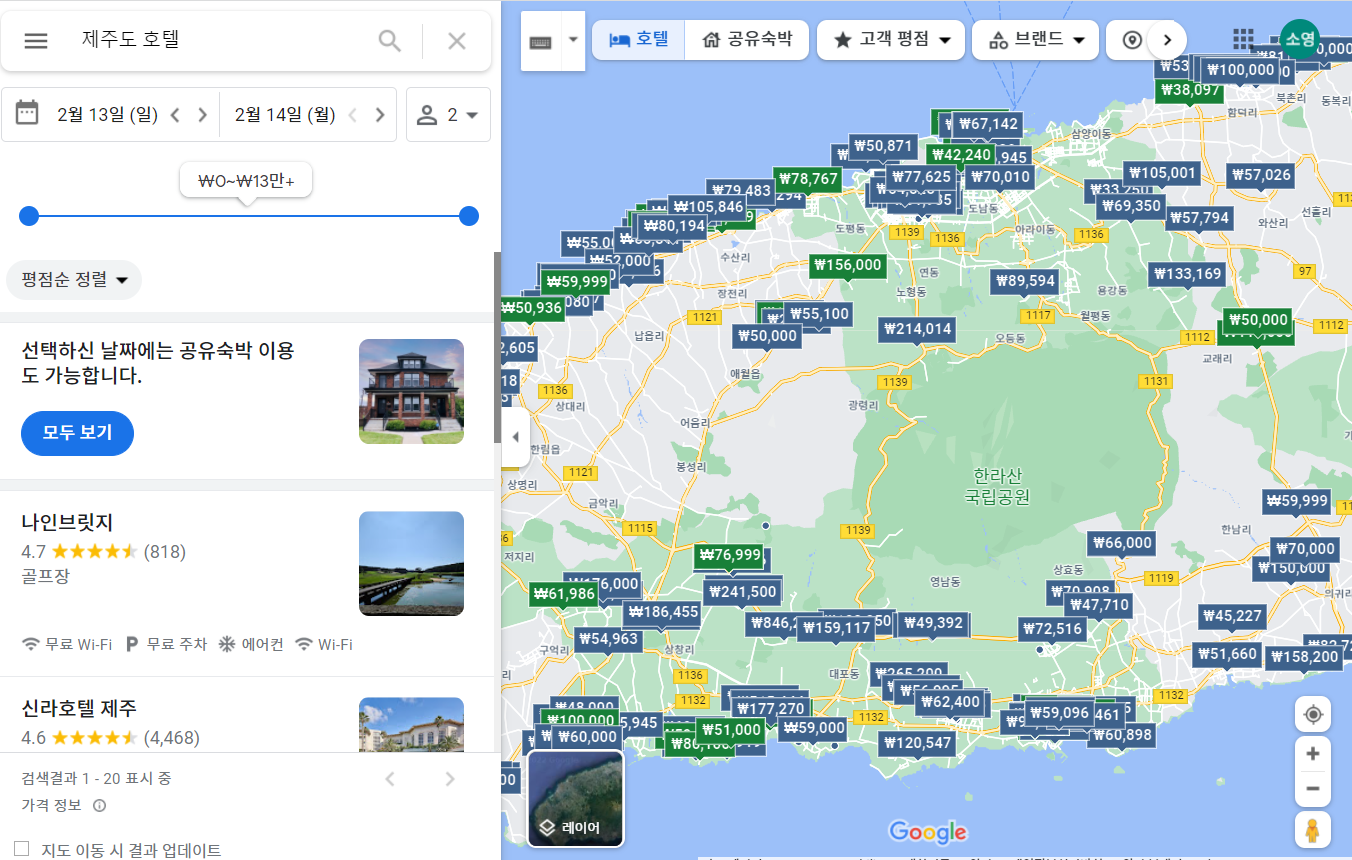

In [ ]:
Image("photo/google_hotel.png")

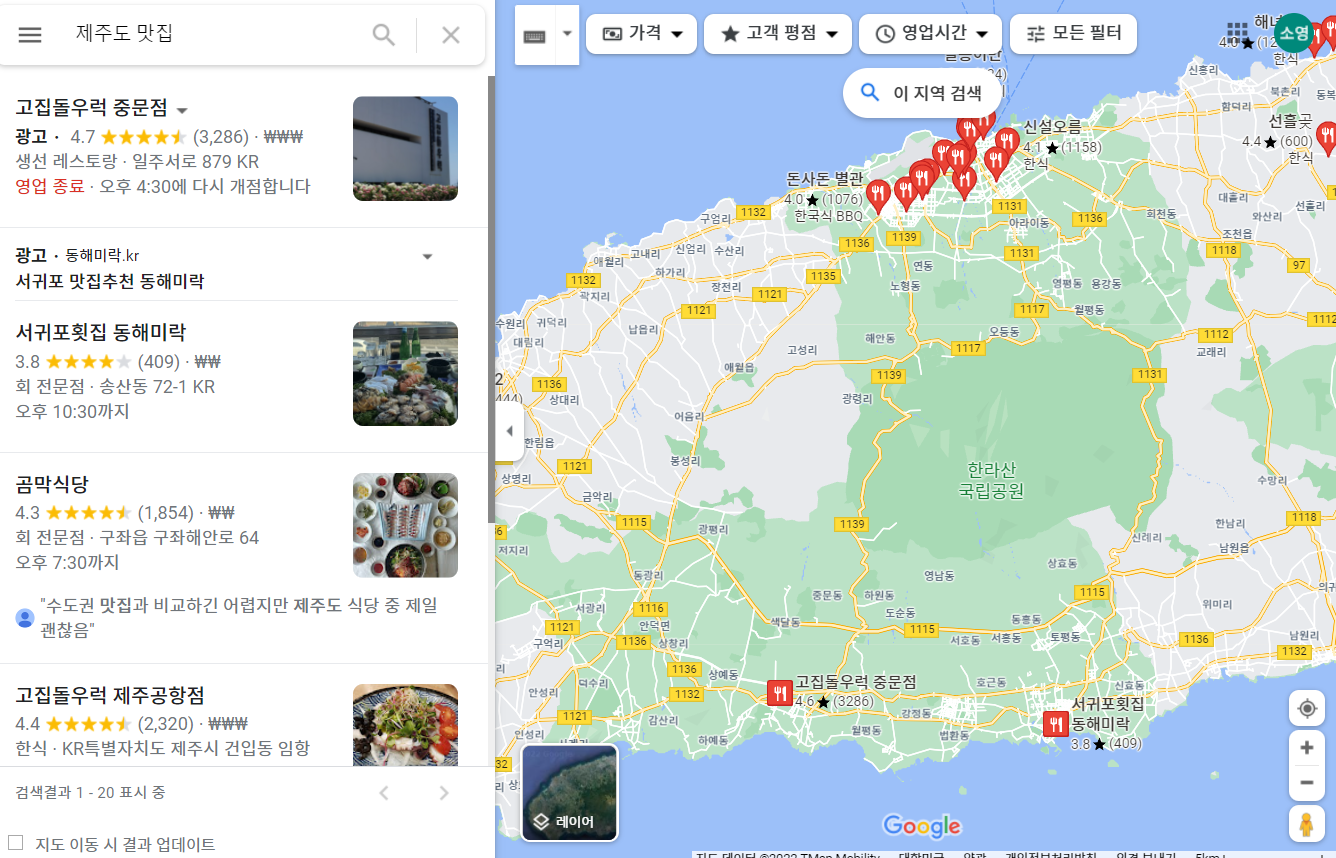

In [ ]:
Image("photo/google_res.png")

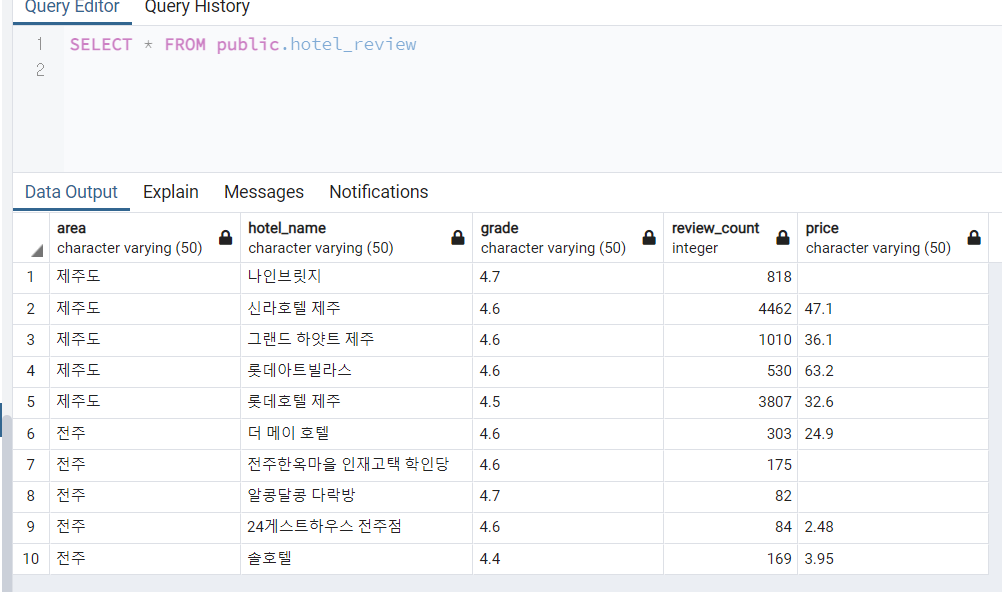

In [ ]:
Image("photo/google_hotel_DB.png")

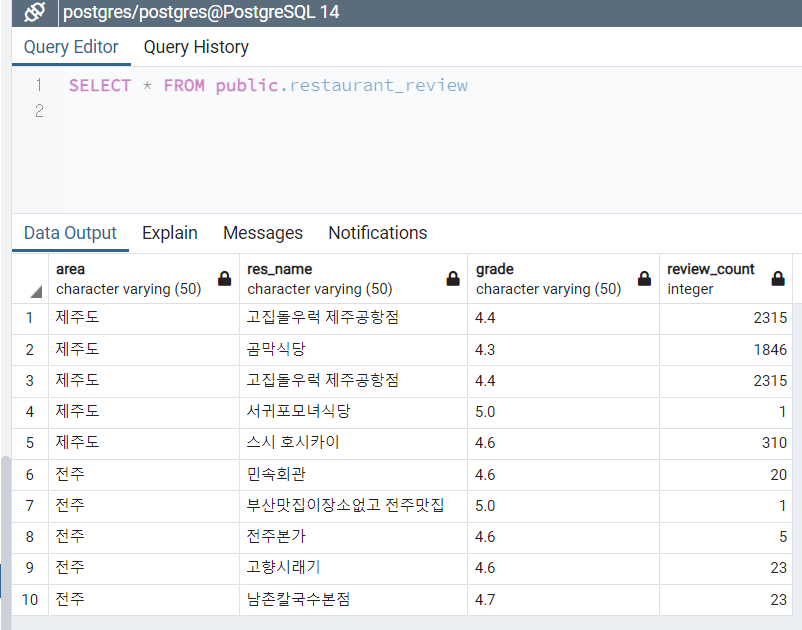

In [ ]:
Image("photo/google_res_DB.png")